<a href="https://colab.research.google.com/github/Mitchell-hub53/WK-3-ASSIGNMENTT-AI-FOR-SOFTWARE-ENGINEERING-/blob/main/iris_classifier_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9333, Precision (weighted): 0.9333, Recall (weighted): 0.9333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



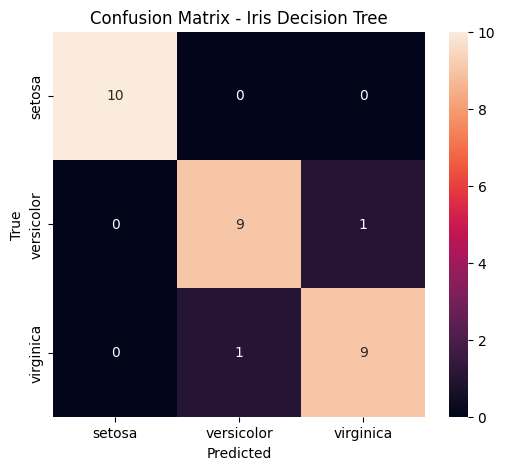


Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- sepal length (cm) <= 6.15
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.15
|   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.00
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [1]:
# 2A_iris_decision_tree.ipynb
# Run this cell first in Colab/Jupyter

# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target  # already numeric

# 2. (Demonstration) Handle missing values - if any (Iris has none, but show steps)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 3. Encode labels (already numeric in sklearn dataset). If text labels:
# le = LabelEncoder(); y_encoded = le.fit_transform(y_text)
y_encoded = y

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 5. Train Decision Tree
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

# 6. Predict & evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {acc:.4f}, Precision (weighted): {prec:.4f}, Recall (weighted): {rec:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# 7. Confusion matrix plot (screenshot this for report)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix - Iris Decision Tree')
plt.show()

# 8. Optional: show decision rules (text)
rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", rules)
